<a href="https://colab.research.google.com/github/lisawermers/MAT421/blob/main/MAT421FinalPaperNeverSmoked.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MAT421 Final Project
**By: Lisa Wermers**

For my project, I’ll be analyzing data from the Behavioral Risk Factor Surveillance System (BRFSS) about smokers in the US (and a few surrounding territories). The study was titled “BRFSS Prevalence and Trends Data: Tobacco Use - Four Level Smoking Data for 1995-2010” and was published in 2013. They collected data to calculate the percentages of people who have never smoked, those who are former smokers, those who smoke every few days, and those who smoke every single day. Notably, the Virgin Islands had the smallest percentage of smokers in 2010 with only 3.6% of the people surveyed smoking every day (BRFSS). Likewise, the highest percentage is Kentucky in 2002 with 29.1% of the surveyed individuals smoking every day (BRFSS).

I think it’s interesting that Kentucky takes up so much of the top 10 even over so many different years. Unfortunately, this project doesn’t leave a lot of room for interpretation of why this is the case. I’m sure there are many cultural and location based factors that influence these numbers and cause them to be higher in some parts of the country compared to others. That could be a very compelling topic to write about but it's difficult to use those types of factors to predict the future using the models/methods I have planned for this project. 


For this project I chose to focus specifically on the "Never Smoked" category. I took the top 5 states in 1995 and analyzed how their trends changed over the next 15 years. The top 5 states and their 1995 percentages were: 
- **Georgia:** 61.6%
- **Oklahoma:** 61.2%
- **Hawaii:** 60.9%
- **Maryland:** 58.3%
- **California:** 56.7%



To begin, for each set of data I made a bar graph. 

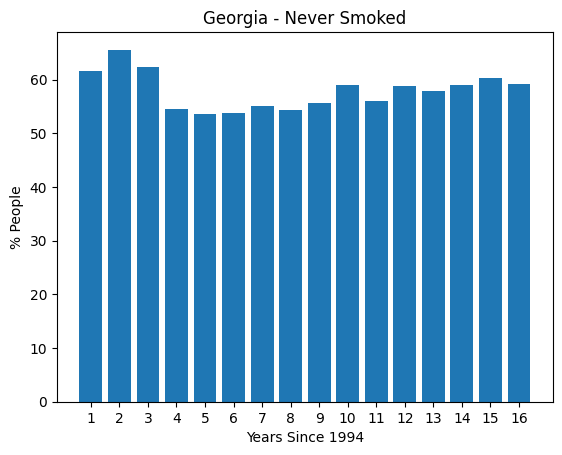

In [ ]:
import matplotlib.pyplot as plt
   
y = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']
x = [61.6, 65.6, 62.3, 54.5, 53.7, 53.8, 55.1, 54.3, 55.6, 59.1, 56, 58.8, 57.9, 59.1, 60.3, 59.3]

plt.bar(y, x)
plt.title('Georgia - Never Smoked')
plt.xlabel('Years Since 1994')
plt.ylabel('% People')
plt.show()

This is a good way to visually see how the percentages have changed over the years. For Georgia specifically, you can see how they had a large initial dip in 1998 but have been steadily increasing ever since. This is a good sign as out of all the categories this is the only one we want to go up. 

Next, I ran a cubic spline interpolation on the data sets. I felt this was the best way to represent it as none of the data looked linear, and this is the easiest interpolation method to understand. 

For each state I also plotted the average cubic spline interpolation alongside with it so we can see how they compare. Below you can see that Georgia's first few years are ver far off the average. Even though there's that large drop, I'll still consider it a good thing because they're above average. But after about 1999 the data is quite similar. 

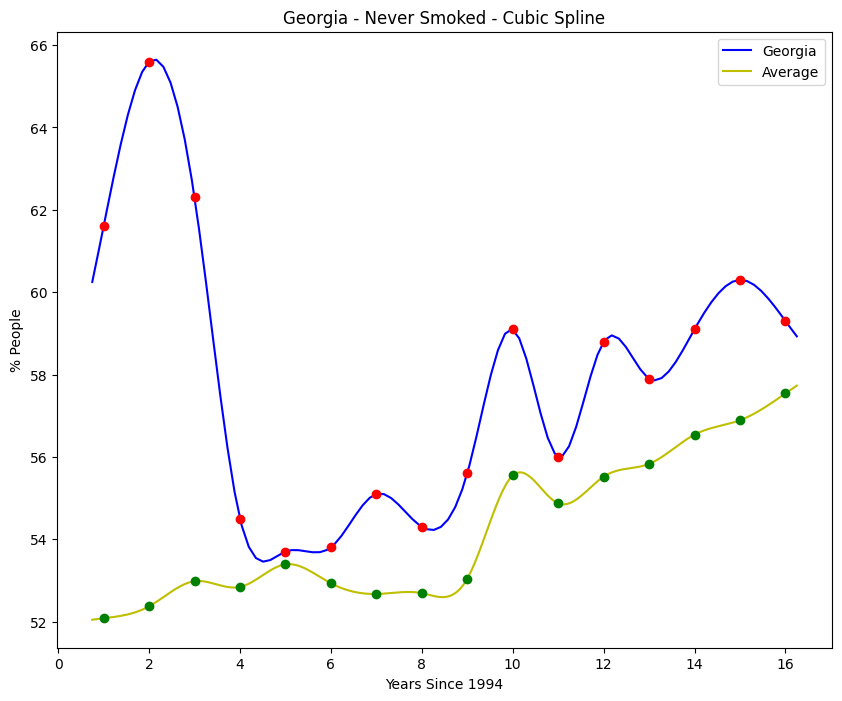

In [34]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
y = [61.6, 65.6, 62.3, 54.5, 53.7, 53.8, 55.1, 54.3, 55.6, 59.1, 56, 58.8, 57.9, 59.1, 60.3, 59.3]

f = CubicSpline(x, y, bc_type = 'natural')
x_new = np.linspace(0.75, 16.25, 100)
y_new = f(x_new)

plt.figure(figsize = (10, 8))
plt.plot(x_new, y_new, 'b', label='Georgia')
plt.plot(x, y, 'ro')

y1 = [52.08, 52.37, 52.98, 52.84, 53.39, 52.93, 52.67, 52.69, 53.04, 55.55, 54.87, 55.52, 55.83, 56.54, 56.89, 57.54]
g = CubicSpline(x, y1, bc_type = 'natural')
x_new1 = np.linspace(0.75, 16.25, 200)
y_new1 = g(x_new1)
plt.plot(x_new1, y_new1, 'y', label='Average')
plt.plot(x, y1, 'go')
plt.legend()

plt.title('Georgia - Never Smoked - Cubic Spline')
plt.xlabel('Years Since 1994')
plt.ylabel('% People')
plt.show()

The final thing that I did for each of my data sets was run a polynomial regression. I also computed the $R^2$ value and predicted the percentage of people who have never smoked in 2020 (i.e. 26 years after 1994). 

For Georgia, the $R^2$ value wasn't great but also wasn't terrible. It was a value of 0.65. And the prediction for 2020 was 16.55%. However, compared to an article that I found called "Georgia Tobacco Use Surveillance Report", in 2013 61% of Georgians have never smoked before. So while the prediction looks accurate for the data we have, I'm happy that it's so off. There must be other social factors that have impacted how many people are smoking no compared to the 90's and early 2000's. 

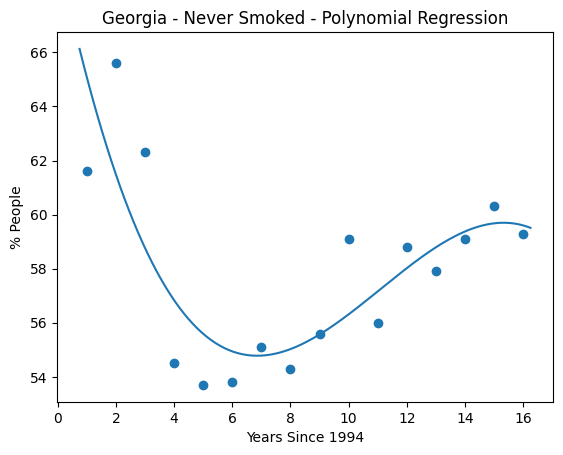

R² Value: 0.65
2020 Preduction: 16.55%


In [28]:
import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
y = [61.6, 65.6, 62.3, 54.5, 53.7, 53.8, 55.1, 54.3, 55.6, 59.1, 56, 58.8, 57.9, 59.1, 60.3, 59.3]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(0.75, 16.25, 200)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.title('Georgia - Never Smoked - Polynomial Regression')
plt.xlabel('Years Since 1994')
plt.ylabel('% People')
plt.show()

print("R\u00b2 Value: " + str(round(r2_score(y, mymodel(x)), 2)))

predict = mymodel(26)
print("2020 Preduction: " + str(round(predict, 2)) + "%")

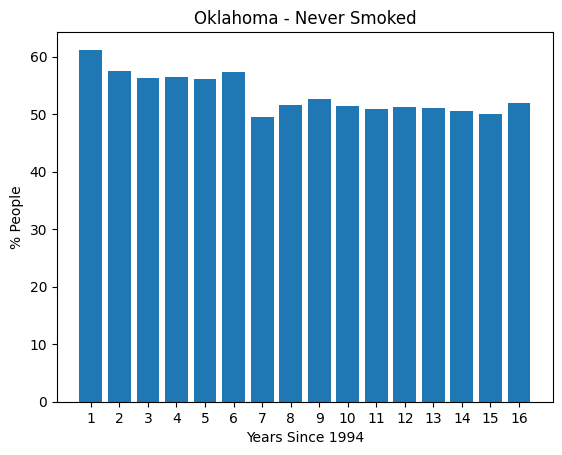

In [ ]:
import matplotlib.pyplot as plt
   
y = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']
x = [61.2, 57.5, 56.3, 56.5, 56.1, 57.4, 49.5, 51.6, 52.7, 51.4, 50.9, 51.2, 51, 50.6, 50, 52]

plt.bar(y, x)
plt.title('Oklahoma - Never Smoked')
plt.xlabel('Years Since 1994')
plt.ylabel('% People')
plt.show()

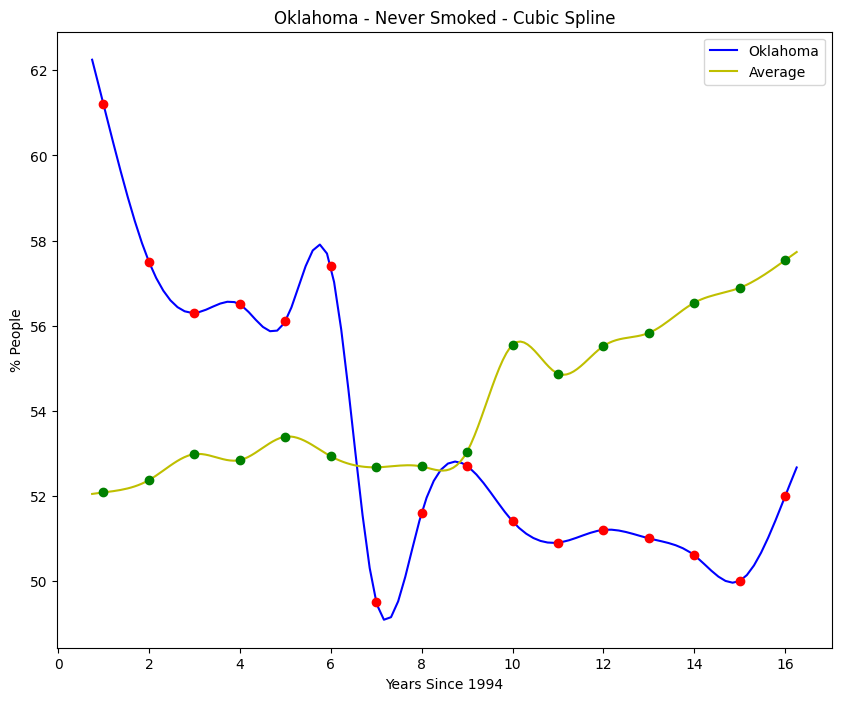

In [35]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
y = [61.2, 57.5, 56.3, 56.5, 56.1, 57.4, 49.5, 51.6, 52.7, 51.4, 50.9, 51.2, 51, 50.6, 50, 52]

f = CubicSpline(x, y, bc_type = 'natural')
x_new = np.linspace(0.75, 16.25, 100)
y_new = f(x_new)

plt.figure(figsize = (10, 8))
plt.plot(x_new, y_new, 'b', label='Oklahoma')
plt.plot(x, y, 'ro')

y1 = [52.08, 52.37, 52.98, 52.84, 53.39, 52.93, 52.67, 52.69, 53.04, 55.55, 54.87, 55.52, 55.83, 56.54, 56.89, 57.54]
g = CubicSpline(x, y1, bc_type = 'natural')
x_new1 = np.linspace(0.75, 16.25, 200)
y_new1 = g(x_new1)
plt.plot(x_new1, y_new1, 'y', label='Average')
plt.plot(x, y1, 'go')
plt.legend()

plt.title('Oklahoma - Never Smoked - Cubic Spline')
plt.xlabel('Years Since 1994')
plt.ylabel('% People')
plt.show()

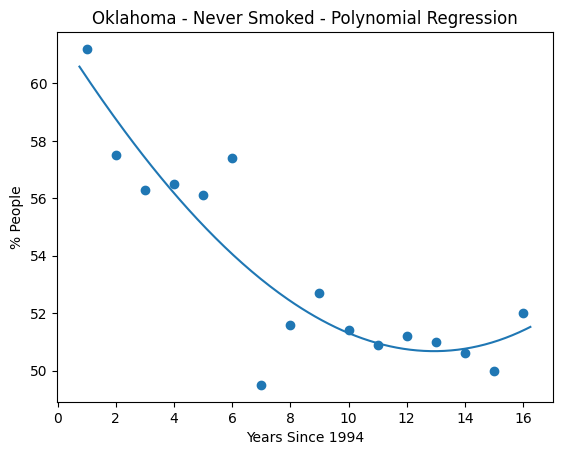

R² Value: 0.82
2020 Preduction: 64.94%


In [29]:
import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
y = [61.2, 57.5, 56.3, 56.5, 56.1, 57.4, 49.5, 51.6, 52.7, 51.4, 50.9, 51.2, 51, 50.6, 50, 52]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(0.75, 16.25, 200)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.title('Oklahoma - Never Smoked - Polynomial Regression')
plt.xlabel('Years Since 1994')
plt.ylabel('% People')
plt.show()

print("R\u00b2 Value: " + str(round(r2_score(y, mymodel(x)), 2)))

predict = mymodel(26)
print("2020 Preduction: " + str(round(predict, 2)) + "%")

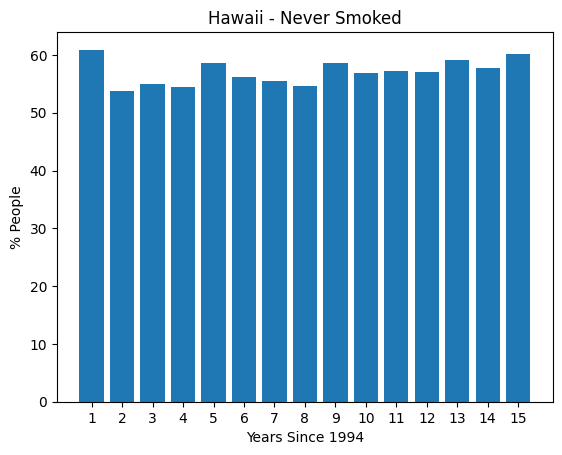

In [ ]:
import matplotlib.pyplot as plt
   
y = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
x = [60.9, 53.7, 54.9, 54.4, 58.6, 56.2, 55.5, 54.7, 58.6, 56.8, 57.3, 57, 59.2, 57.7, 60.2]

plt.bar(y, x)
plt.title('Hawaii - Never Smoked')
plt.xlabel('Years Since 1994')
plt.ylabel('% People')
plt.show()

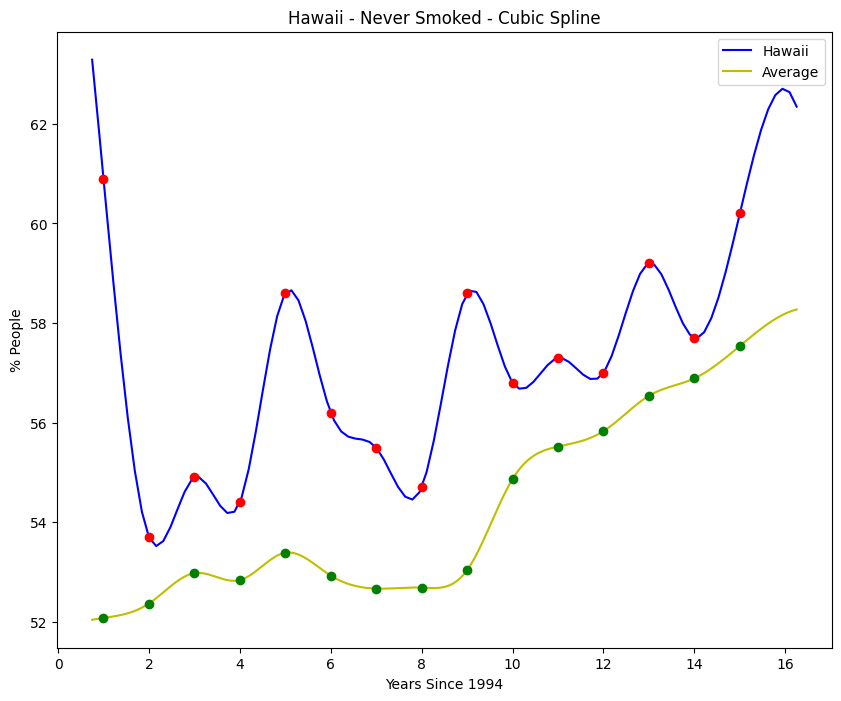

In [36]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
y = [60.9, 53.7, 54.9, 54.4, 58.6, 56.2, 55.5, 54.7, 58.6, 56.8, 57.3, 57, 59.2, 57.7, 60.2]

f = CubicSpline(x, y, bc_type = 'natural')
x_new = np.linspace(0.75, 16.25, 100)
y_new = f(x_new)

plt.figure(figsize = (10, 8))
plt.plot(x_new, y_new, 'b', label='Hawaii')
plt.plot(x, y, 'ro')

y1 = [52.08, 52.37, 52.98, 52.84, 53.39, 52.93, 52.67, 52.69, 53.04, 54.87, 55.52, 55.83, 56.54, 56.89, 57.54]
g = CubicSpline(x, y1, bc_type = 'natural')
x_new1 = np.linspace(0.75, 16.25, 200)
y_new1 = g(x_new1)
plt.plot(x_new1, y_new1, 'y', label='Average')
plt.plot(x, y1, 'go')
plt.legend()

plt.title('Hawaii - Never Smoked - Cubic Spline')
plt.xlabel('Years Since 1994')
plt.ylabel('% People')
plt.show()

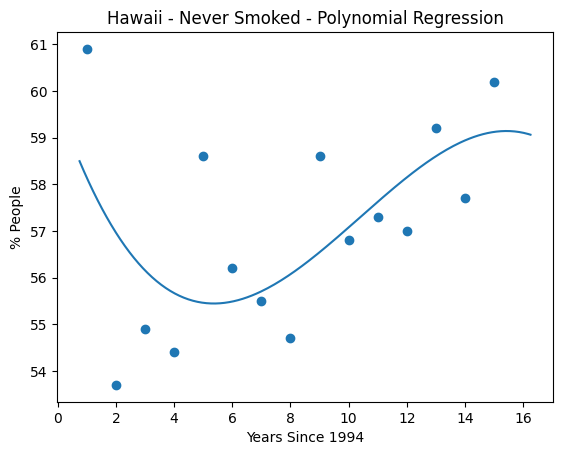

R² Value: 0.36
2020 Preduction: 38.29%


In [30]:
import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
y = [60.9, 53.7, 54.9, 54.4, 58.6, 56.2, 55.5, 54.7, 58.6, 56.8, 57.3, 57, 59.2, 57.7, 60.2]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(0.75, 16.25, 200)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.title('Hawaii - Never Smoked - Polynomial Regression')
plt.xlabel('Years Since 1994')
plt.ylabel('% People')
plt.show()

print("R\u00b2 Value: " + str(round(r2_score(y, mymodel(x)), 2)))

predict = mymodel(26)
print("2020 Preduction: " + str(round(predict, 2)) + "%")

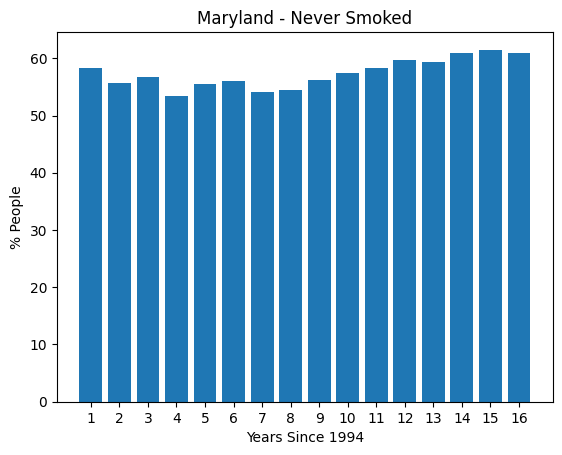

In [ ]:
import matplotlib.pyplot as plt
   
y = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']
x = [58.3, 55.7, 56.8, 53.4, 55.5, 56, 54.2, 54.4, 56.2, 57.5, 58.3, 59.7, 59.3, 60.9, 61.5, 60.9]

plt.bar(y, x)
plt.title('Maryland - Never Smoked')
plt.xlabel('Years Since 1994')
plt.ylabel('% People')
plt.show()

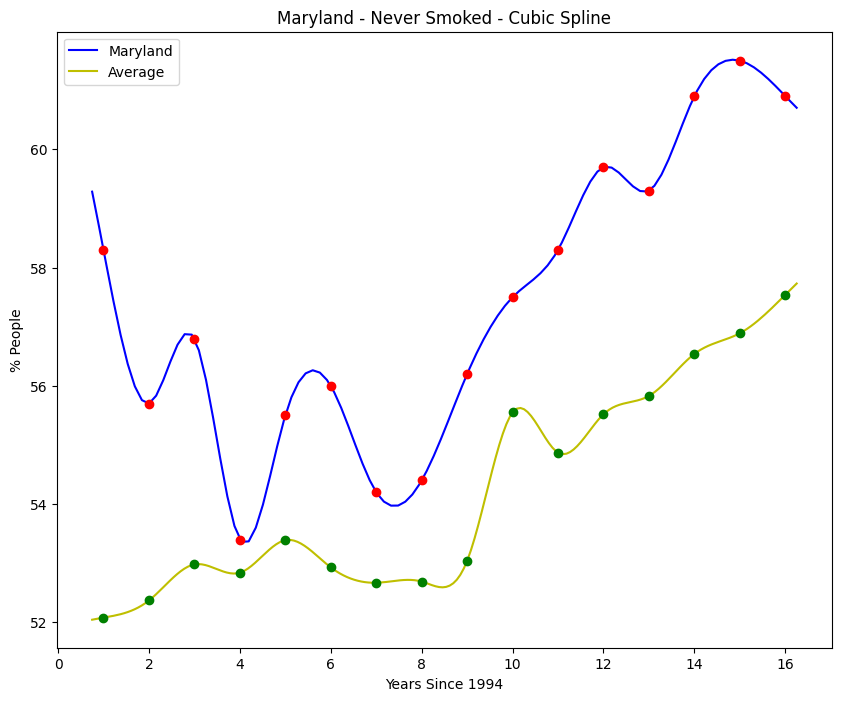

In [37]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
y = [58.3, 55.7, 56.8, 53.4, 55.5, 56, 54.2, 54.4, 56.2, 57.5, 58.3, 59.7, 59.3, 60.9, 61.5, 60.9]

f = CubicSpline(x, y, bc_type = 'natural')
x_new = np.linspace(0.75, 16.25, 100)
y_new = f(x_new)

plt.figure(figsize = (10, 8))
plt.plot(x_new, y_new, 'b', label='Maryland')
plt.plot(x, y, 'ro')

y1 = [52.08, 52.37, 52.98, 52.84, 53.39, 52.93, 52.67, 52.69, 53.04, 55.55, 54.87, 55.52, 55.83, 56.54, 56.89, 57.54]
g = CubicSpline(x, y1, bc_type = 'natural')
x_new1 = np.linspace(0.75, 16.25, 200)
y_new1 = g(x_new1)
plt.plot(x_new1, y_new1, 'y', label='Average')
plt.plot(x, y1, 'go')
plt.legend()

plt.title('Maryland - Never Smoked - Cubic Spline')
plt.xlabel('Years Since 1994')
plt.ylabel('% People')
plt.show()

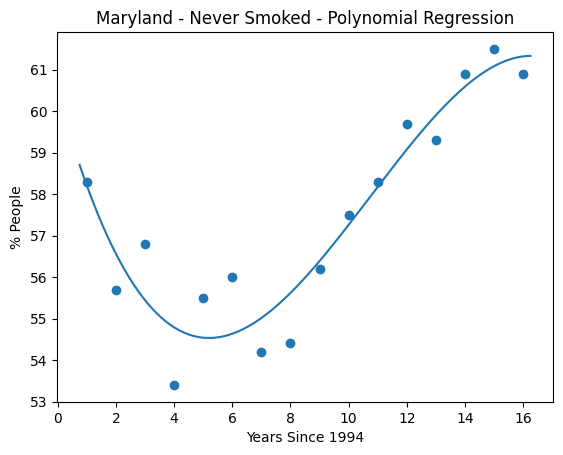

R² Value: 0.89
2020 Preduction: 36.36%


In [31]:
import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
y = [58.3, 55.7, 56.8, 53.4, 55.5, 56, 54.2, 54.4, 56.2, 57.5, 58.3, 59.7, 59.3, 60.9, 61.5, 60.9]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(0.75, 16.25, 200)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.title('Maryland - Never Smoked - Polynomial Regression')
plt.xlabel('Years Since 1994')
plt.ylabel('% People')
plt.show()

print("R\u00b2 Value: " + str(round(r2_score(y, mymodel(x)), 2)))

predict = mymodel(26)
print("2020 Preduction: " + str(round(predict, 2)) + "%")

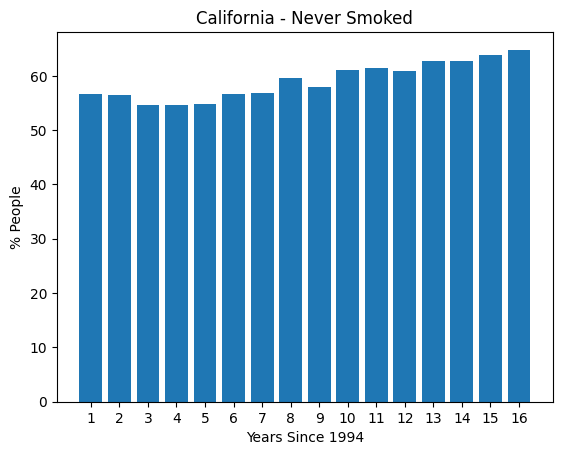

In [ ]:
import matplotlib.pyplot as plt
   
y = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']
x = [56.7, 56.4, 54.6, 54.6, 54.9, 56.7, 56.9, 59.6, 58, 61.1, 61.5, 60.8, 62.8, 62.7, 63.9, 64.8]

plt.bar(y, x)
plt.title('California - Never Smoked')
plt.xlabel('Years Since 1994')
plt.ylabel('% People')
plt.show()

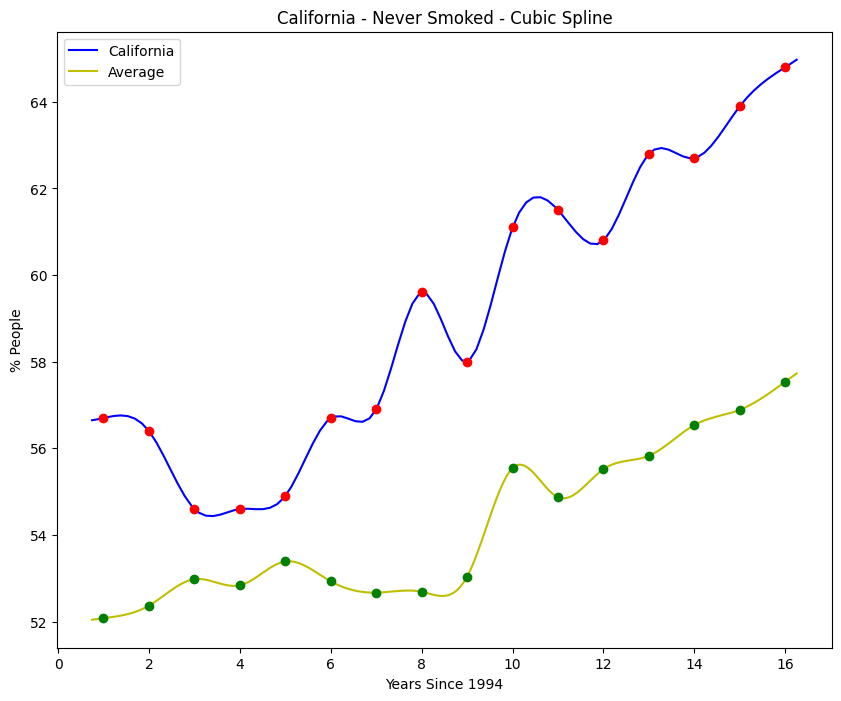

In [38]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
y = [56.7, 56.4, 54.6, 54.6, 54.9, 56.7, 56.9, 59.6, 58, 61.1, 61.5, 60.8, 62.8, 62.7, 63.9, 64.8]

f = CubicSpline(x, y, bc_type = 'natural')
x_new = np.linspace(0.75, 16.25, 100)
y_new = f(x_new)

plt.figure(figsize = (10, 8))
plt.plot(x_new, y_new, 'b', label='California')
plt.plot(x, y, 'ro')

y1 = [52.08, 52.37, 52.98, 52.84, 53.39, 52.93, 52.67, 52.69, 53.04, 55.55, 54.87, 55.52, 55.83, 56.54, 56.89, 57.54]
g = CubicSpline(x, y1, bc_type = 'natural')
x_new1 = np.linspace(0.75, 16.25, 200)
y_new1 = g(x_new1)
plt.plot(x_new1, y_new1, 'y', label='Average')
plt.plot(x, y1, 'go')
plt.legend()

plt.title('California - Never Smoked - Cubic Spline')
plt.xlabel('Years Since 1994')
plt.ylabel('% People')
plt.show()

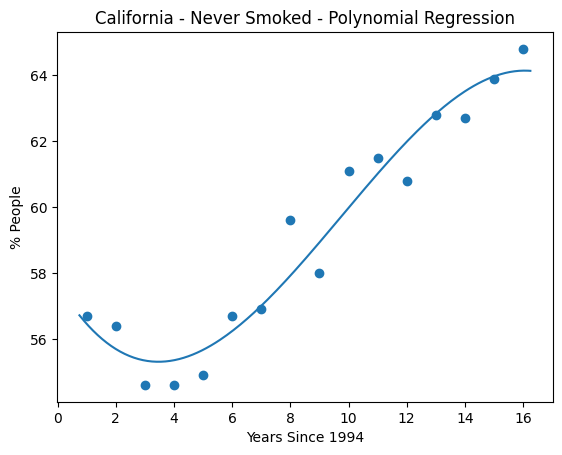

R² Value: 0.94
2020 Preduction: 38.87%


In [32]:
import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
y = [56.7, 56.4, 54.6, 54.6, 54.9, 56.7, 56.9, 59.6, 58, 61.1, 61.5, 60.8, 62.8, 62.7, 63.9, 64.8]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(0.75, 16.25, 200)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.title('California - Never Smoked - Polynomial Regression')
plt.xlabel('Years Since 1994')
plt.ylabel('% People')
plt.show()

print("R\u00b2 Value: " + str(round(r2_score(y, mymodel(x)), 2)))

predict = mymodel(26)
print("2020 Preduction: " + str(round(predict, 2)) + "%")

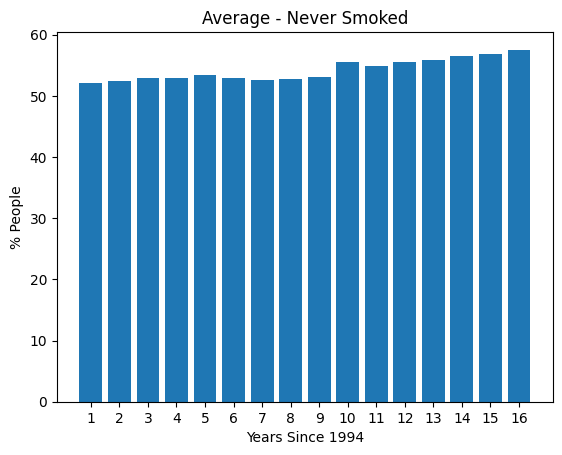

In [ ]:
import matplotlib.pyplot as plt
   
y = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']
x = [52.08, 52.37, 52.98, 52.84, 53.39, 52.93, 52.67, 52.69, 53.04, 55.55, 54.87, 55.52, 55.83, 56.54, 56.89, 57.54]

plt.bar(y, x)
plt.title('Average - Never Smoked')
plt.xlabel('Years Since 1994')
plt.ylabel('% People')
plt.show()

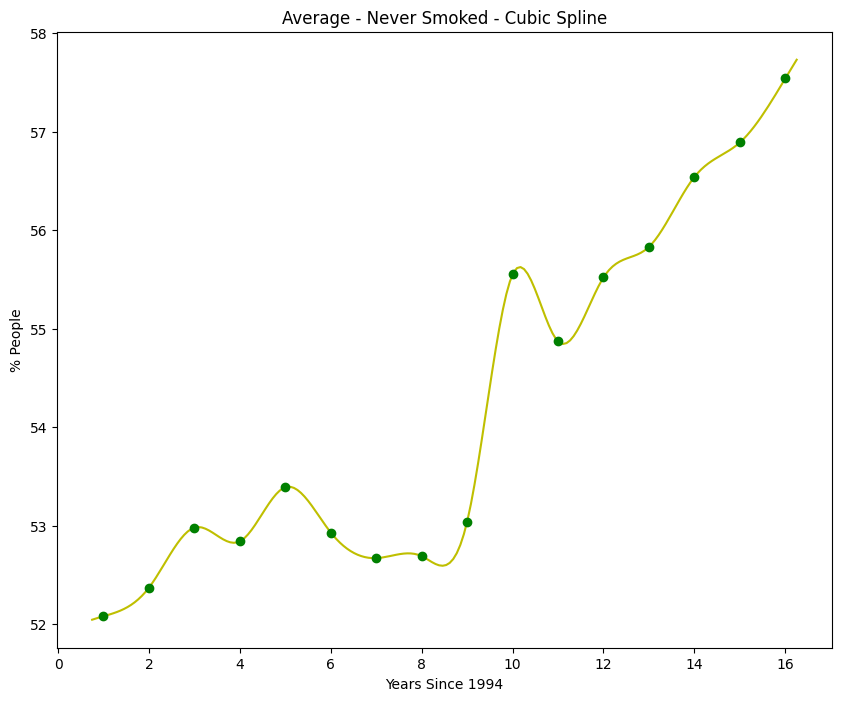

In [39]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

plt.figure(figsize = (10, 8))

y1 = [52.08, 52.37, 52.98, 52.84, 53.39, 52.93, 52.67, 52.69, 53.04, 55.55, 54.87, 55.52, 55.83, 56.54, 56.89, 57.54]
g = CubicSpline(x, y1, bc_type = 'natural')
x_new1 = np.linspace(0.75, 16.25, 200)
y_new1 = g(x_new1)
plt.plot(x_new1, y_new1, 'y')
plt.plot(x, y1, 'go')

plt.title('Average - Never Smoked - Cubic Spline')
plt.xlabel('Years Since 1994')
plt.ylabel('% People')
plt.show()

I ran the same procedures on the average data as I did the top 5 states for this category but I did add one additional thing. I compared the cubic spline interpolation to the Lagrange polynomial interpolation. While they both did a pretty good job approximating and filling in the gaps between the years, overall the cubic spline was better in my opinion. The Lagrange polynomial has large spikes between the years closer to the end points and it makes the graph more difficult to read and interpret. While I'm sure it's an effective method of interpolation, I think for this project the cubic spline did a better job. 

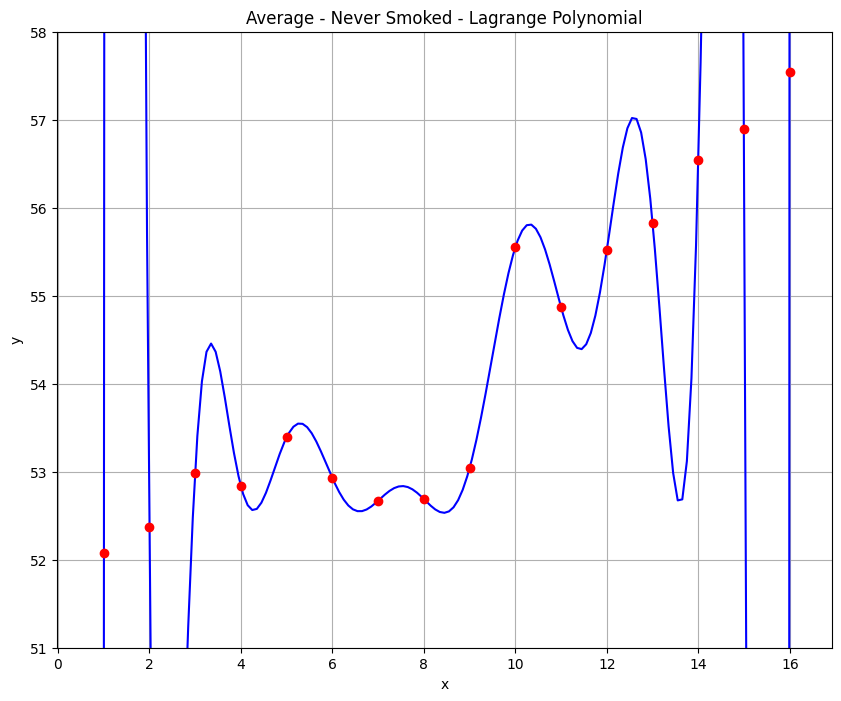

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
     
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
y = [52.08, 52.37, 52.98, 52.84, 53.39, 52.93, 52.67, 52.69, 53.04, 55.55, 54.87, 55.52, 55.83, 56.54, 56.89, 57.54]

x_new = np.arange(0.75, 16.25, .1)

f = lagrange(x, y)
     
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Average - Never Smoked - Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(51, 58)
plt.show()

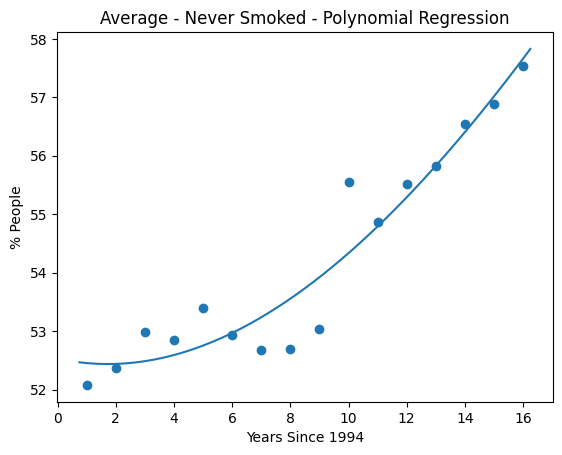

R² Value: 0.91
2020 Preduction: 65.5%


In [33]:
import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
y = [52.08, 52.37, 52.98, 52.84, 53.39, 52.93, 52.67, 52.69, 53.04, 55.55, 54.87, 55.52, 55.83, 56.54, 56.89, 57.54]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(0.75, 16.25, 200)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.title('Average - Never Smoked - Polynomial Regression')
plt.xlabel('Years Since 1994')
plt.ylabel('% People')
plt.show()

print("R\u00b2 Value: " + str(round(r2_score(y, mymodel(x)), 2)))

predict = mymodel(26)
print("2020 Preduction: " + str(round(predict, 2)) + "%")

##References

Centers for Disease Control and Prevention. (2013, June 11). BRFSS prevalence and trends data: Tobacco use - four level smoking data for 1995-2010. Centers for Disease Control and Prevention. Retrieved February 25, 2023, from https://data.cdc.gov/Smoking-Tobacco-Use/BRFSS-Prevalence-and-Trends-Data-Tobacco-Use-Four-/8zak-ewtm 

Chung, A., Lavender, A., Bayakly, R., 2015 Georgia Tobacco Use Surveillance Report. Georgia Department of Public Health, Health Protection, Epidemiology, Chronic Disease, Healthy Behaviors and Injury Epidemiology Section, October 2015 